# Implementación del algoritmo Firefly

En esta libreta se presenta la implementacion del algoritmo de Firefly para optimización.

El primer paso es importar las librerías necesarias para manipular datos, números aleatorios, graficar, etc.

In [3]:
# Manejo de arreglos y operaciones matematicas
import numpy as np

# Importar funciones
import import_ipynb
from utils import FuncionesObjetivo as f

# Numeros aleatorios
import random

# Para visualizar las animaciones
%matplotlib notebook

## Implementación de funciones

En los siguientes bloques de código se implementan funciones requeridas para poder realizar el algoritmo de Firefly

In [120]:
def distancia(xi, xj):
    """
    Esta funcion calcula la distancia euclideana entre dos partiuclas
    - input: 
        - xi, xj: particulas entre las que se calculara la distancia
        - output: distancia entre las particulas
    """
    # Se usa la distancia al cuadrado porque calcular raiz es muy caro computacionalmente
    return np.sum(np.square(xi - xj), axis=-1)

def actualizar(xi, xj, b0, gamma, alpha):
    """
    Esta funcion actuaiza la posicion de la particula
    - input:
        - xi, xj: partiula que se actualizara y particula con la que se compara, respectivamente
        - b0: atraccion inicial
        - gamma: coeficiente de absorcion
        - alpha: mutacion
    - output: posicion actualizada de la particula
    """
    r = distancia(X[i], X[j])  # Calcular la distancia entre las particulas
    # Actualizar posicion
    xi += (b0 * np.exp(-gamma * r) * (xj - xi)) + alpha * (np.random.rand() - 0.5)
    # clipear la posicion de la particula para que no se salga de los limits
    xi = np.clip(xi, a_min=rango[:, 0], a_max=rango[:, 1])
    return xi

## Definir Hiperparámetros del algoritmo

Ahora se asignan los valores para los hiperparámetros del algoritmo como la atracción inicial, el coeficiente de absorcion, y la mutacion

In [134]:
# ------------------ Del Problema ------------------
d = 2  # Numero de dimensiones
funcion = f.f_schewefel # funcion objetivo
rango = [[-500, 500]]  # Rango de las variables
mark = [420.96, 420.96, 0]  # Minimo real (si se conoce)

# ------------------ Del Algoritmo ------------------
n = 50  # Numero de particulas
b0 = 1  # atraccion inicial
gamma = 1  # Coeficiente de absorcion
alpha = 0.2  # mutacion
max_gen = 100  # Maximo de generaciones
tol = 1e-6  # Tolerancia para detener el algoritmo

# ------------------ Del visualizacion ------------------
animacion = True  # Realizar animacion o no
levels = 20 # numero de curvas de nivel

AttributeError: module 'utils.FuncionesObjetivo' has no attribute 'f_schewefel'

## Implementacion del algoritmo

Ahora se implementa el algoritmo de firefly usando las funciones y los hiperparámetros definidos anteriormente

El óptimo está en [-0.059  0.002] con un fitness de 0.0019
Obtenido en la generación 100


<IPython.core.display.Javascript object>


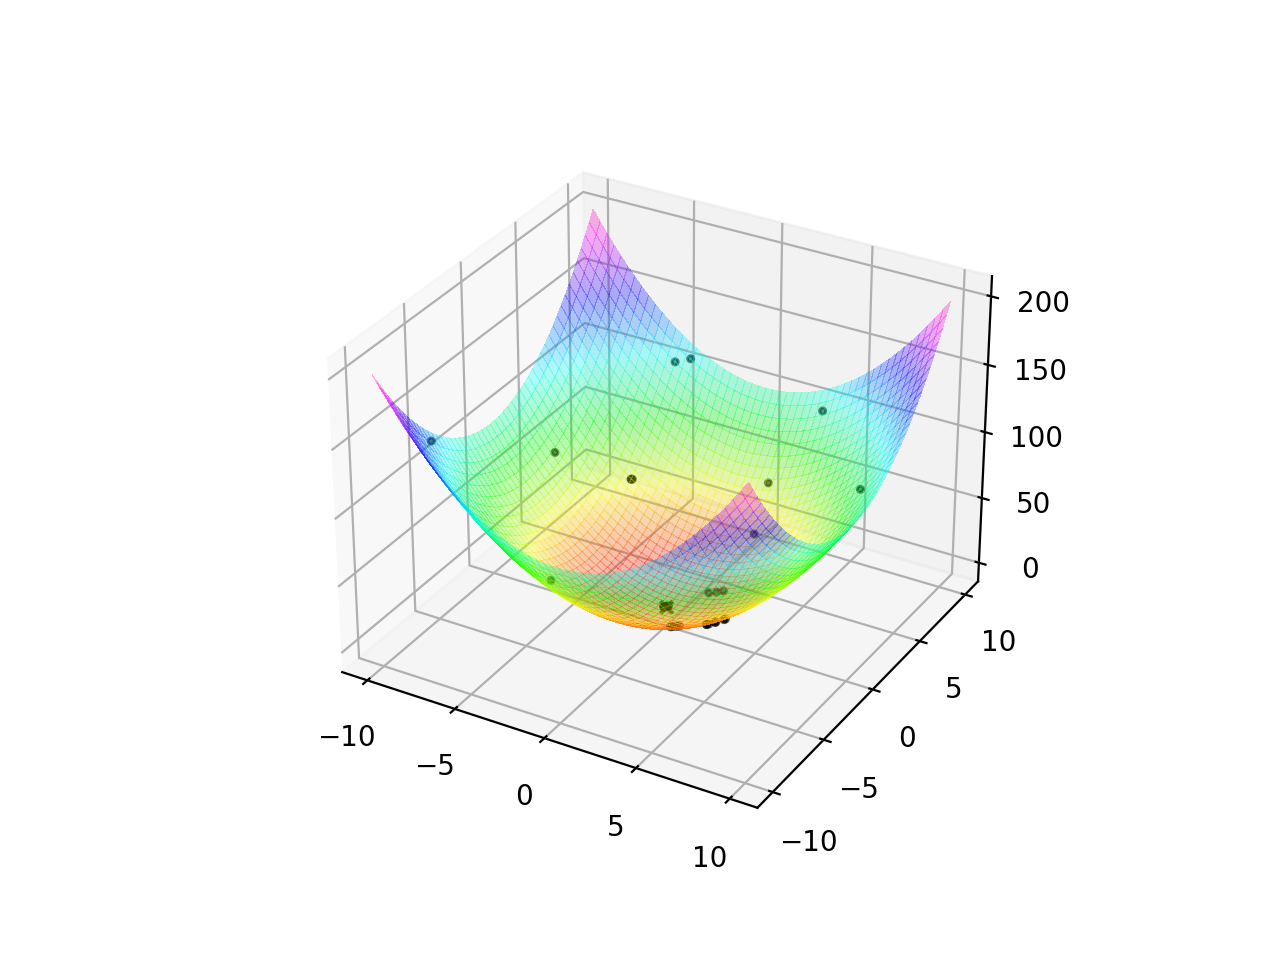

<IPython.core.display.Javascript object>


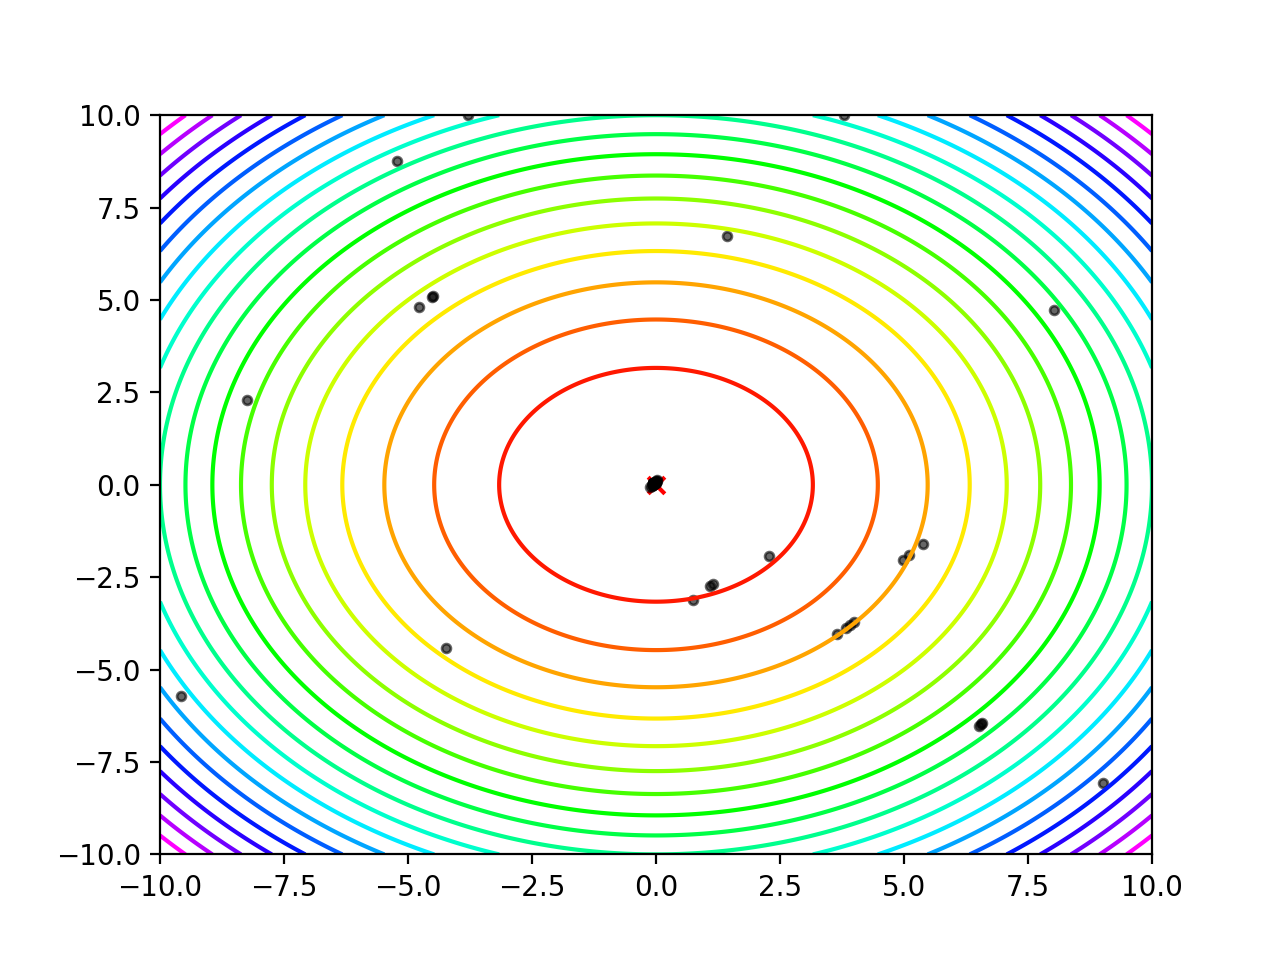

In [133]:
# Si solo hay un rango se considera el mismo rango para todas las variables
if len(rango) == 1:
    rango *= d
# Convertir rango a np.array
rango = np.array(rango)

# Definimos un mejor fitness grande para iniciar el algoritmo
mejor_fitness= np.infty
gen = 0

# Crear un vetor de soluciones para cada dimension con su rango dado
X = np.random.uniform(low=rango[:, 0], high=rango[:,1], size=((n, d)))

# Inicializar la intensidad de las particulas con el fitness
I = funcion(X)

# Variable para guardar la historia de cada generacion (para animar)
historia = []

# Seguir con el algoritmo mientra sean menos de 200 generaciones o el fitness sea menor a 0.001
while((mejor_fitness > tol) and (gen < max_gen)):
    
    # Guardar la posicion de la generacion actual si se va a animar
    if animacion:
        img = np.hstack((X, I.reshape(-1, 1)))
        historia.append(img)
    
    # Actualizar particulas
    for i in range(len(X)):  # Para cada particula
        for j in range(len(X)):  # Comparar con cada particula
            # Checar las intensidades, si la de i es mayor que la de j, se mueve i a j (porque se esta minimizando)
            if I[i] >= I[j]:  # Si son iguales, la particula se mueve aleatoriamente
                # Mover la particula i a j
                X[i] = actualizar(X[i], X[j], b0, gamma, alpha)
                # Actualizar la intensidad de la particula i
                I[i] = funcion(X[i].reshape((-1, d)))
                
    # Mejor fitness de la poblacion
    mejor_fitness_pop = np.min(I)
    
    # Si el mejor fitness de la poblacion es mejor que el mejor fitness, se actualiza el mejor fitness
    if mejor_fitness_pop < mejor_fitness:
        mejor_fitness = mejor_fitness_pop
        # Obtener la particula con el mejor fitness
        part_opt = X[np.argmin(I)]
    
    # Aumentar la generacion
    gen += 1
    
# Una vez concluido el algoritmo se muestran los resultados
print(f"El óptimo está en {np.around(part_opt, 3)} con un fitness de {mejor_fitness:0.4f}")
print(f"Obtenido en la generación {gen}")

# Graficar la funcion con su minimo menos para colville
if funcion != f.f_colville and not animacion:
    fig, ax = f.graficar(funcion, rango=rango, n_dims=d, mark=list(y_hat[0])+[funcion(y_hat)[0]])
    
elif animacion:
    anim = f.animar_superficie(historia, funcion, rango, d, mark=mark)
    # Mostrar grafica de contorno si la grafica es 3D
    if d == 2:
        anim_c =f.animar_contorno(historia, funcion, rango, mark=mark, levels=levels)